In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [38]:
from dataclasses import dataclass
@dataclass
class Config:
  # Data
  raw_data_dir = './drive/MyDrive/Arabic Punctuation Dataset/SSAC-UNPC'
  ABD_data_dir = './drive/MyDrive/Arabic Punctuation Dataset/ABC'
  cleaned_data_dir = './drive/MyDrive/Arabic Punctuation Dataset/Cleaned-Data/full-corpus'
  ABC_cleaned_data_dir = './drive/MyDrive/Arabic Punctuation Dataset/Cleaned-Data/ABC'

  # Logs
  per_file_stats_json_dir = './drive/MyDrive/Arabic Punctuation Dataset/Logs/full-corpus/per_file_stats.jsonl'
  ABC_per_file_stats_json_dir = './drive/MyDrive/Arabic Punctuation Dataset/Logs/ABC/per_file_stats.jsonl'
  corpus_summary_json_dir = './drive/MyDrive/Arabic Punctuation Dataset/Logs/full-corpus/corpus_summary.json'
  run_log_dir = './drive/MyDrive/Arabic Punctuation Dataset/Logs/run.log'


In [3]:
import os
def load_data(folder_path):
    with os.scandir(folder_path) as entries:
        for entry in entries:
            if entry.is_file() and entry.name.endswith('.txt'):
                try:
                    with open(entry.path, 'r', encoding='utf-8', errors='replace') as file:
                        content = file.read()
                        yield {
                            'path': entry.path,
                            'filename': entry.name,
                            'content': content,
                            'size': os.path.getsize(entry.path)
                        }
                except Exception as e:
                    print(f"Error reading {entry.name}: {e}")
            elif entry.is_dir():
                yield from load_data(entry.path)

In [10]:
path = Config.raw_data_dir
data = list(load_data(path))

for content in data:
    print(f"Filename: {content['filename']}")
    print(f"Size: {content['size']} bytes")


Filename: ABC_2.txt
Size: 114782 bytes
Filename: ABC_1.txt
Size: 54325 bytes
Filename: ABC_3.txt
Size: 6817 bytes
Filename: ABC_4.txt
Size: 9071 bytes
Filename: ABC_5.txt
Size: 14660 bytes
Filename: ABC_7.txt
Size: 7140 bytes
Filename: ABC_8.txt
Size: 23256 bytes
Filename: ABC_9.txt
Size: 188631 bytes
Filename: ABC_10.txt
Size: 3127 bytes
Filename: ABC_11.txt
Size: 26607 bytes
Filename: ABC_14.txt
Size: 56785 bytes
Filename: ABC_13.txt
Size: 56635 bytes
Filename: ABC_15.txt
Size: 46209 bytes
Filename: ABC_6.txt
Size: 20204 bytes
Filename: ABC_12.txt
Size: 13061 bytes
Filename: ABC_16.txt
Size: 79779 bytes
Filename: ABC_17.txt
Size: 43423 bytes
Filename: ABC_18.txt
Size: 19554 bytes
Filename: ABC_19.txt
Size: 50406 bytes
Filename: ABC_20.txt
Size: 33985 bytes
Filename: ABC_21.txt
Size: 59923 bytes
Filename: ABC_22.txt
Size: 12031 bytes
Filename: ABC_23.txt
Size: 26509 bytes
Filename: ABC_25.txt
Size: 20805 bytes
Filename: ABC_26.txt
Size: 32918 bytes
Filename: ABC_27.txt
Size: 44857 byt

# Counting the occurrences of each character  

In [ ]:
def count_chart(data, title='Character Occurrences'):
    from collections import Counter
    all_text = ''.join([item['content'] for item in data])
    char_counts = Counter(all_text)
    print("Chart Count is\n" , char_counts)
    chars = list(char_counts.keys())
    counts = list(char_counts.values())

    plt.figure(figsize=(12, 6))
    sns.barplot(x=chars, y=counts)
    plt.title(title)
    plt.xlabel('Characters')
    plt.ylabel('Occurrences')
    plt.xticks(rotation=90)
    plt.show()


Chart Count is
 Counter({' ': 201782, 'ا': 119967, 'ل': 98206, 'ي': 61693, 'م': 51613, 'و': 49570, 'ن': 48315, 'ر': 36035, 'ه': 32052, 'ت': 31442, 'ب': 31135, 'ع': 29169, 'ف': 24362, 'د': 21952, 'أ': 21074, 'ة': 20306, 'ق': 18561, 'ك': 18232, 'س': 18160, 'َ': 17743, '.': 14984, 'ح': 14958, 'ج': 11823, '،': 10859, 'إ': 8378, 'ى': 8151, 'ذ': 8148, 'ص': 7743, '\n': 7459, 'ط': 7283, 'خ': 7031, 'ش': 7020, 'ِ': 6610, 'ُ': 6213, 'ث': 5652, 'ض': 5503, 'ّ': 5379, 'ْ': 5191, 'ً': 4736, 'ز': 4393, 'غ': 3753, 'ء': 3515, '\t': 3296, 'ئ': 3130, ':': 2510, 'ظ': 2268, '"': 1335, 'آ': 1167, '«': 1145, '»': 1123, '—': 964, 'ٍ': 835, 'ؤ': 830, ')': 712, '(': 672, '؟': 528, 'ٌ': 520, '١': 507, '!': 423, '؛': 395, '-': 383, '2': 365, '٢': 335, '1': 262, '٣': 234, 'e': 221, '٤': 216, '٨': 211, '•': 207, '٥': 199, '٩': 199, 'a': 184, '٠': 173, '٦': 172, '٧': 159, 'o': 156, 'i': 153, '0': 153, '\xa0': 152, 'n': 143, 'r': 139, 's': 136, 't': 122, '…': 116, '3': 108, '8': 96, '5': 95, '–': 88, 'l': 87, '9': 87,

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65018 (\N{ARABIC LIGATURE SALLALLAHOU ALAYHE WASALLAM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 1754 (\N{ARABIC SMALL HIGH JEEM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Matplotlib currently does not support Arabic natively.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtoo

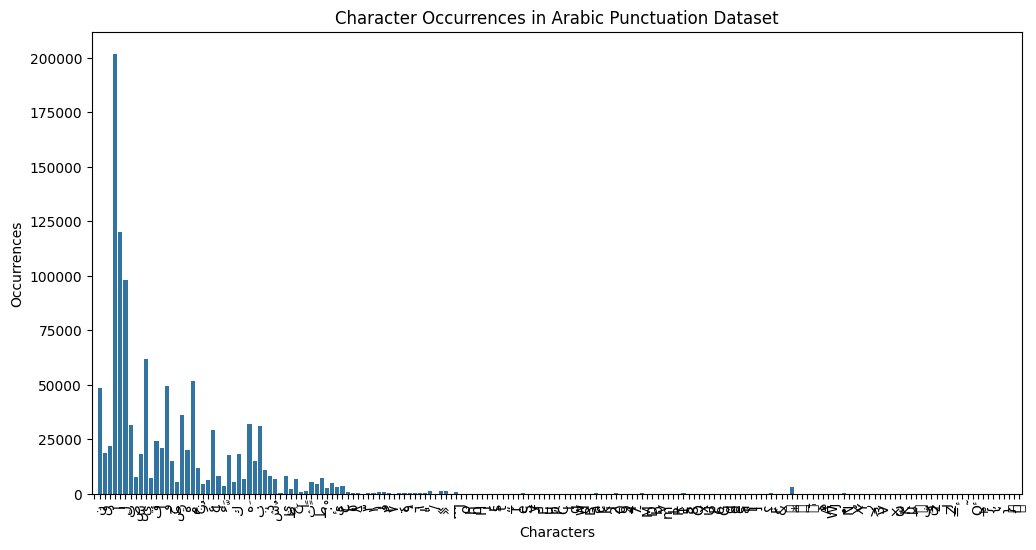

In [ ]:
count_chart(data, title='Character Occurrences in Arabic Punctuation Dataset')

Least Common Characters: [('à', 1), ('\u200e', 1), ('\u200f', 1), ('&', 1), ('ۚ', 1), ('X', 1), ('٫', 1), ('>', 1), ('ω', 1), ('μ', 1), ("'", 1), ('j', 1), ('Z', 1), ('ٓ', 1), ('°', 1), ('U', 2), ('è', 2), ('Y', 2), ('ڨ', 2), ('Q', 2), ('+', 2), ('ﱢ', 2), ('x', 3), ('ٰ', 3), ('z', 3), ('I', 4), ('ﻟ', 4), ('\u2009', 4), ('F', 5), ('ۖ', 5), ('’', 5), ('‘', 5), ('ﱠ', 5), ('”', 6), ('−', 6), ('v', 7), ('O', 7), ('é', 7), ('“', 8), ('E', 8)]


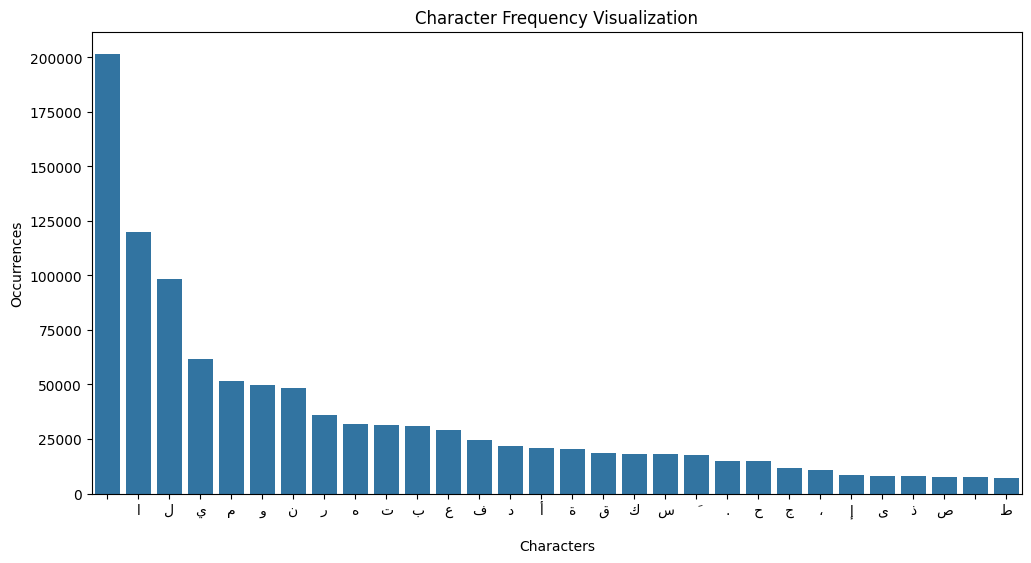

In [ ]:
from collections import Counter, defaultdict
import string

class CharacterAnalyzer:
    def __init__(self, text: str):
        self.text = text
        self.char_counts = self._count_all_chars()

    def _count_all_chars(self) -> dict:
        """Count all characters in the text"""
        return dict(Counter(self.text))

    def get_sorted_counts(self, descending: bool = True) -> list:
        """Get character counts sorted by frequency"""
        return sorted(
            self.char_counts.items(),
            key=lambda x: x[1],
            reverse=descending
        )

    def get_char_frequency(self, char: str) -> int:
        """Get frequency of a specific character"""
        return self.char_counts.get(char, 0)

    def get_total_chars(self) -> int:
        """Get total number of characters"""
        return len(self.text)

    def get_most_common(self, n: int = 10) -> list:
        """Get n most common characters"""
        sorted_counts = self.get_sorted_counts(descending=True)
        return sorted_counts[:n]

    def get_least_common(self, n: int = 10) -> list:
        """Get n least common characters"""
        sorted_counts = self.get_sorted_counts(descending=False)
        return sorted_counts[:n]
    def get_number_of_unique_chars(self) -> int:
        """Get number of unique characters"""
        return len(self.char_counts)
    def get_char_stats(self) -> dict:
        """Get comprehensive character statistics"""
        total = self.get_total_chars()
        unique = self.get_number_of_unique_chars()

        return {
            'total_characters': total,
            'unique_characters': unique,
            'most_common': self.get_most_common(5),
            'least_common': self.get_least_common(5)
        }

    def visualize_counts(self, top_n: int = 20, title: str = 'Character Frequency Visualization'):
        """visualization of character frequencies"""
        counter = Counter(self.text)
        most_common = counter.most_common(top_n)
        chars, counts = zip(*most_common)

        plt.figure(figsize=(12, 6))
        sns.barplot(x=chars, y=counts)
        plt.title(title)
        plt.xlabel('Characters')
        plt.ylabel('Occurrences')
        plt.show()


# Usage
text = ''.join([item['content'] for item in data])

analyzer = CharacterAnalyzer(text)

print("Least Common Characters:", analyzer.get_least_common(40))
analyzer.visualize_counts(top_n=30)

### as we see, there are too much characters that must be removed, so we're going to specify our vocabulary

In [ ]:
# Arabic Alphabet (Modern Standard Arabic)
ARABIC_LETTERS = [
    # Arabic Alphabet
    'ا', 'ب', 'ت', 'ث', 'ج', 'ح', 'خ', 'د', 'ذ', 'ر', 'ز', 'س', 'ش', 'ص',
    'ض', 'ط', 'ظ', 'ع', 'غ', 'ف', 'ق', 'ك', 'ل', 'م', 'ن', 'ه', 'و', 'ي',

    # Hamza forms and variations
    'أ', 'إ', 'آ', 'ؤ', 'ئ', 'ء',

    # Ta Marbuta
    'ة',

    # Alif Maqsura
    'ى',

    # Lam-Alif
    'لا',

    # Additional letters used in various Arabic dialects
    'پ', 'چ', 'ژ', 'گ', 'ڤ',  # Used in some dialects/regions
]

# Arabic Numbers (Eastern Arabic numerals)
ARABIC_NUMERALS = [
    '٠', '١', '٢', '٣', '٤', '٥', '٦', '٧', '٨', '٩'  # 0-9
]

# Standard Western Numbers (also commonly used)
WESTERN_NUMBERS = [
    '0', '1', '2', '3', '4', '5', '6', '7', '8', '9'
]

# Arabic Punctuation and Diacritics
ARABIC_PUNCTUATION = [
    '،',  # Arabic comma
    '؛',  # Arabic semicolon
    '؟',  # Arabic question mark
    '!',  # Exclamation mark
    '.',  # Full Stop
    ':',  # Colon
]
LATIN_PUNCTUATION = [
    ',', # Latin comma
    ';', # Latin semicolon
    '?', # Latin question mark
 ]

LATIN_TO_ARABIC_PUNCTUATION = {
    ',': '،',
    ';': '؛',
    '?': '؟',
}
LATIN_TO_ARABIC_NUMBERS = {
    '0': '٠',
    '1': '١',
    '2': '٢',
    '3': '٣',
    '4': '٤',
    '5': '٥',
    '6': '٦',
    '7': '٧',
    '8': '٨',
    '9': '٩'
}
# Arabic Diacritics
ARABIC_DIACRITICS = [
    # Short vowels
    # 'َ',  # Fatha
    # 'ُ',  # Damma
    # 'ِ',  # Kasra

    # # Tanween (nunation)
    # 'ً',  # Fathatan
    # 'ٌ',  # Dammatan
    # 'ٍ',  # Kasratan

    # # Sukun
    # 'ْ',  # Sukun

    # Shadda
    'ّ',  # Shadda (gemination)
]

# Combine everything
ARABIC_VOCABULARY = (
    ARABIC_LETTERS +
    ARABIC_NUMERALS +
    WESTERN_NUMBERS +
    ARABIC_PUNCTUATION +
    LATIN_PUNCTUATION +
    ARABIC_DIACRITICS
)

# Or create separate lists for different purposes
CHART_SETS = {
    'letters': ARABIC_LETTERS,
    'arabic_numerals': ARABIC_NUMERALS,
    'western_numbers': WESTERN_NUMBERS,
    'punctuation': ARABIC_PUNCTUATION,
    'diacritics': ARABIC_DIACRITICS,
    'all': ARABIC_VOCABULARY,
}

# Create a dictionary with character indices
def create_arabic_vocab_dict(include_special_tokens: bool = True) -> dict:
    """
    Create a complete Arabic vocabulary dictionary with indices
    """
    # Base vocabulary
    base_vocab = ARABIC_VOCABULARY.copy()

    # Add special tokens if requested
    special_tokens = []
    if include_special_tokens:
        special_tokens = ['[PAD]', '[UNK]', '[BOS]', '[EOS]', '[MASK]', '[SEP]', '[CLS]']
        base_vocab = special_tokens + base_vocab

    # Create mapping dictionaries
    char_to_idx = {char: idx for idx, char in enumerate(base_vocab)}
    idx_to_char = {idx: char for char, idx in char_to_idx.items()}

    return {
        'char_to_idx': char_to_idx,
        'idx_to_char': idx_to_char,
        'vocabulary': base_vocab,
        'vocab_size': len(base_vocab),
        'special_tokens': special_tokens if include_special_tokens else [],
        'stats': {
            'letters': len(ARABIC_LETTERS),
            'arabic_numerals': len(ARABIC_NUMERALS),
            'western_numbers': len(WESTERN_NUMBERS),
            'punctuation': len(ARABIC_PUNCTUATION),
            'diacritics': len(ARABIC_DIACRITICS),
        }
    }




In [ ]:
def cleanData(text: str) -> str:
    """Clean text by removing unwanted characters"""
    allowed_chars = set(ARABIC_VOCABULARY + list(string.whitespace))
    cleaned_text = ''.join([char for char in text if char in allowed_chars])
    return cleaned_text

### Statistics before cleaning:

In [ ]:
print(analyzer.get_char_stats())

{'total_characters': 1145591, 'unique_characters': 180, 'most_common': [(' ', 201782), ('ا', 119967), ('ل', 98206), ('ي', 61693), ('م', 51613)], 'least_common': [('à', 1), ('\u200e', 1), ('\u200f', 1), ('&', 1), ('ۚ', 1)]}


### Statistics after cleaning

In [ ]:
cleaned_data = cleanData(text)
new_analyzer = CharacterAnalyzer(cleaned_data)
print(new_analyzer.get_char_stats())

{'total_characters': 1094115, 'unique_characters': 68, 'most_common': [(' ', 201782), ('ا', 119967), ('ل', 98206), ('ي', 61693), ('م', 51613)], 'least_common': [(',', 29), ('پ', 66), ('4', 78), ('7', 81), ('6', 85)]}


In [ ]:
print(len(ARABIC_VOCABULARY) - new_analyzer.get_number_of_unique_chars())

4


### so there are 6 characters that are not presented in the dataset

In [ ]:
def get_not_presented_charters(vocabulary: list, analyzer: CharacterAnalyzer) -> list:
    """Get characters from vocabulary not present in the analyzed text"""
    not_presented = [char for char in vocabulary if analyzer.get_char_frequency(char) == 0]
    return not_presented

In [ ]:
get_not_presented_charters(ARABIC_VOCABULARY, new_analyzer)

['لا', 'چ', 'ژ', 'گ', 'ڤ', ';', '?']

In [32]:
from __future__ import annotations

import re
from typing import Dict, Iterable, List, Tuple, Sequence


class ArabicPunctuationProcessor:
    """
    Processor for Arabic text for punctuation classification task
    Handles word/character level processing, punctuation extraction and data preparation
    """
    ARABIC_LETTERS: Sequence[str] = (
        'ا', 'ب', 'ت', 'ث', 'ج', 'ح', 'خ', 'د', 'ذ', 'ر', 'ز', 'س', 'ش', 'ص',
        'ض', 'ط', 'ظ', 'ع', 'غ', 'ف', 'ق', 'ك', 'ل', 'م', 'ن', 'ه', 'و', 'ي',
        'أ', 'إ', 'آ', 'ؤ', 'ئ', 'ء',
        'ة',
        'ى',
        'پ', 'چ', 'ژ', 'گ', 'ڤ',
    )

    ARABIC_NUMERALS: Sequence[str] = ('٠', '١', '٢', '٣', '٤', '٥', '٦', '٧', '٨', '٩')
    WESTERN_NUMBERS: Sequence[str] = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')

    ARABIC_PUNCTUATION: Sequence[str] = ('،', '؛', '؟', '!', '.', ':')
    LATIN_PUNCTUATION: Sequence[str] = (',', ';', '?')

    LATIN_TO_ARABIC_PUNCTUATION: Dict[str, str] = {',': '،', ';': '؛', '?': '؟'}
    LATIN_TO_ARABIC_NUMBERS: Dict[str, str] = {
        '0': '٠', '1': '١', '2': '٢', '3': '٣', '4': '٤',
        '5': '٥', '6': '٦', '7': '٧', '8': '٨', '9': '٩'
    }


     # Label space
    CLASS_TO_PUNCTUATION: Dict[int, str] = {
        0: "",
        1: '،',
        2: '؛',
        3: ':',
        4: '.',
        5: '؟',
        6: '!'
    }
    PUNCTUATION_TO_CLASS: Dict[str, int] = {
        '': 0,
        '،': 1,
        '؛': 2,
        ':': 3,
        '.': 4,
        '؟': 5,
        '!': 6
    }

    # هذه المصفوفة لتوزيع الفواصل حسب اهميتها لمعالجة التويكينز التي تحتوي على اكثر من علامة ترقيم مختلفة مثل ?!!

    MULTI_PUNCT_PRIORITY: Sequence[str] = ("؟", "!", ".", "،", "؛", ":")

    # regext للحركات ومحارف التي قد تخرب اداء الموديل مثل /n
    ARABIC_DIACRITICS_RE = re.compile(r"[\u064B-\u065F\u0670\u06D6-\u06ED]")
    CONTROL_CHARS_RE = re.compile(r"[\u0000-\u001F\u007F-\u009F]")

    # لتحويل الفواصل اللاتينية للعربية
    _PUNCT_TRANSLATION = str.maketrans(LATIN_TO_ARABIC_PUNCTUATION)
    _NUM_TRANSLATION = str.maketrans(LATIN_TO_ARABIC_NUMBERS)

    ARABIC_CHART_VOCABULARY: Sequence[str] = tuple(
        list(ARABIC_LETTERS) +
        list(ARABIC_NUMERALS) +
        list(WESTERN_NUMBERS) +
        list(ARABIC_PUNCTUATION) +
        list(LATIN_PUNCTUATION)
    )
    ARABIC_CHAR_VOCABULARY: Sequence[str] = ARABIC_CHART_VOCABULARY

    def __init__(
        self,
        remove_diacritics: bool = True,
    ):
        self.remove_diacritics = remove_diacritics


        """
        هنا استعملمت re.escape لان بعض الفواصل لها معنى في ال regex
        مثل النقطة، فهي تعني اي رقم من المحارف
        ولهل هذه المشكلة يتم اضافة \\ قبل كل نوع لنقول لل regex
        اننا نريد هذا كمحرف، لا ان يفهمه كتعليمة
        """
        punct_escaped = ''.join(re.escape(p) for p in self.ARABIC_PUNCTUATION)
        self._PUNCT_SEP_RE = re.compile(f"([{punct_escaped}])")
        self._WS_RE = re.compile(r"\s+")

        # Helpful sets for fast membership checks
        self._PUNCT_SET = set(self.ARABIC_PUNCTUATION)


    def _strip_control_chars(self, text: str) -> str:
      return self.CONTROL_CHARS_RE.sub("", text)

    def _normalize_punctuation(self, text: str) -> str:
        # Maps only the characters present in the translation table
        return text.translate(self._PUNCT_TRANSLATION)
    def _normalize_numbers(self, text: str) -> str:
        return text.translate(self._NUM_TRANSLATION)

    def _remove_diacritics(self, text: str) -> str:
        if self.remove_diacritics:
            return self.ARABIC_DIACRITICS_RE.sub("", text)
        return text

    def _separate_punctuation(self, text: str) -> str:
        """
        هاذا التابع يضيف مسافة قبل وبعد علامات الترقيم
        """
        text = self._PUNCT_SEP_RE.sub(r" \1 ", text)
        return self._WS_RE.sub(" ", text).strip()

    def tokenize_arabic_words(self, text: str) -> list:
        """Tokenize cleaned Arabic text into words"""
        return text.split()

    def preprocess_text(self, text: str) -> str:
        """
        استدعاء ال pipeline كاملا
        1) ازالة محارف التحكم
        2) توحيد شكل العلامات
        3) توحيد الأرقام
        4) ازالة الحركات
        5) وضع مسافة قبل وبعد العلامات
        6) إزالة المسافات الزائدة
        """
        text = self._strip_control_chars(text)
        text = self._normalize_punctuation(text)
        text = self._normalize_numbers(text)
        text = self._remove_diacritics(text)
        text = self._separate_punctuation(text)

        return self._WS_RE.sub(" ", text).strip()

    def punctuations_to_class(self, punctuation_tokens: Iterable[str]) -> int:
        tokens = set(punctuation_tokens)
        for punct in self.MULTI_PUNCT_PRIORITY:
            if punct in tokens:
                return self.PUNCTUATION_TO_CLASS[punct]
        return 0

    def split_tokens_labels(self, text: str) -> Tuple[List[str], List[int]]:
        """
        تقسيم النص إلى مصفوفتين، مصفوفة كلمات ومصفوفة وسوم من 0 إالى 6
        """
        text = self.preprocess_text(text)

        words: List[str] = []
        labels: List[int] = []
        pending_punctuations: List[str] = []

        for token in self.tokenize_arabic_words(text):
            if token in self._PUNCT_SET:
                pending_punctuations.append(token)
                continue


            if pending_punctuations and labels:
                labels[-1] = self.punctuations_to_class(pending_punctuations)
                pending_punctuations.clear()

            words.append(token)
            labels.append(self.PUNCTUATION_TO_CLASS[''])

        if pending_punctuations and labels:
            labels[-1] = self.punctuations_to_class(pending_punctuations)

        return words, labels






In [ ]:

text = "مرحبًا، كيف حالك؟ 123.1 ???؟؟؟ ,,,,,,,,,,,،،،،/ ـ،/:"""""""

text2 = """
قَالَ الطَّبِيبُ: هَلْ تُعَانِي مِنْ صُدَاعٍ مُسْتَمِرٍّ، أَمْ أَنَّ الأَلَمَ يَظْهَرُ أَحْيَانًا فَقَطْ؟
أَجَابَهُ الْمَرِيضُ: أَشْعُرُ بِالتَّعَبِ مُنْذُ ثَلَاثَةِ أَيَّامٍ، وَلَا أَسْتَطِيعُ النَّوْمَ جَيِّدًا!
وَأَضَافَ: هَلْ هٰذَا طَبِيعِيٌّ؟! أَمْ يَجِبُ أَنْ أُرَاجِعَ الْمُسْتَشْفَى فَوْرًا؟
فِي الْحَقِيقَةِ، قَالَ الطَّبِيبُ؛ إِنَّ هٰذِهِ الأَعْرَاضَ شَائِعَةٌ، لَكِنَّهَا قَدْ تُشِيرُ إِلَى مُشْكِلَةٍ خَطِيرَةٍ.
تَنَاوَلِ الدَّوَاءَ بِانْتِظَامٍ، وَاشْرَبِ الْمَاءَ، وَلَا تُهْمِلِ الرَّاحَةَ... ثُمَّ رَاقِبْ حَالَتَكَ.
"""
processor = ArabicPunctuationProcessor(remove_diacritics=True)



print("Original Text:", text2)

cleaned = processor.preprocess_text(text2)
print("Cleaned Text:", processor.preprocess_text(text2))
print("Tokenized Words:", processor.tokenize_arabic_words(cleaned))

words, labels = processor.split_tokens_labels(text2)

print("words are" , words)
print("labels are" , labels)

for idx, word in enumerate(words):
    print(f"Word: {word} , class : {labels[idx]} , punctuation : {list(processor.PUNCTUATION_TO_CLASS.keys())[labels[idx]]}")

Original Text: 
قَالَ الطَّبِيبُ: هَلْ تُعَانِي مِنْ صُدَاعٍ مُسْتَمِرٍّ، أَمْ أَنَّ الأَلَمَ يَظْهَرُ أَحْيَانًا فَقَطْ؟
أَجَابَهُ الْمَرِيضُ: أَشْعُرُ بِالتَّعَبِ مُنْذُ ثَلَاثَةِ أَيَّامٍ، وَلَا أَسْتَطِيعُ النَّوْمَ جَيِّدًا!
وَأَضَافَ: هَلْ هٰذَا طَبِيعِيٌّ؟! أَمْ يَجِبُ أَنْ أُرَاجِعَ الْمُسْتَشْفَى فَوْرًا؟
فِي الْحَقِيقَةِ، قَالَ الطَّبِيبُ؛ إِنَّ هٰذِهِ الأَعْرَاضَ شَائِعَةٌ، لَكِنَّهَا قَدْ تُشِيرُ إِلَى مُشْكِلَةٍ خَطِيرَةٍ.
تَنَاوَلِ الدَّوَاءَ بِانْتِظَامٍ، وَاشْرَبِ الْمَاءَ، وَلَا تُهْمِلِ الرَّاحَةَ... ثُمَّ رَاقِبْ حَالَتَكَ.

Cleaned Text: قال الطبيب : هل تعاني من صداع مستمر ، أم أن الألم يظهر أحيانا فقط ؟ أجابه المريض : أشعر بالتعب منذ ثلاثة أيام ، ولا أستطيع النوم جيدا ! وأضاف : هل هذا طبيعي ؟ ! أم يجب أن أراجع المستشفى فورا ؟ في الحقيقة ، قال الطبيب ؛ إن هذه الأعراض شائعة ، لكنها قد تشير إلى مشكلة خطيرة . تناول الدواء بانتظام ، واشرب الماء ، ولا تهمل الراحة . . . ثم راقب حالتك .
Tokenized Words: ['قال', 'الطبيب', ':', 'هل', 'تعاني', 'من', 'صداع', 'مستمر', '،', 'أم'

# نظرا لحجم الداتا الضخم، فاننا لا نتسطيع تحميل البيانات كلها للرام، لذلك سوف نقوم بمعالجة الملفات ملف ملف وتخزينهم على الرام


In [29]:
from __future__ import annotations

import json
import os
import logging
from dataclasses import dataclass
from pathlib import Path
from collections import Counter
from typing import Callable, Dict, Optional, Tuple


@dataclass
class CleanStats:
    files_seen: int = 0
    files_processed: int = 0
    lines_processed: int = 0
    chars_in: int = 0
    chars_out: int = 0
    errors: int = 0


def _labels_from_preprocessed(processor, preprocessed_text: str) -> Counter:
    """
    هذا التابع مطابق لتابع فصل النص الى كلمات ووسوم في ال
    processor

    """
    punct_set = set(processor.ARABIC_PUNCTUATION)
    label_counts = Counter()

    pending_punct = []
    have_prev_word = False
    prev_label = 0  # label for the most recent word

    for tok in preprocessed_text.split():
        if tok in punct_set:
            pending_punct.append(tok)
            continue

        # tok is a word
        if have_prev_word:
            if pending_punct:
                prev_label = processor.punctuations_to_class(pending_punct)
                pending_punct.clear()
            else:
                prev_label = 0
            label_counts[processor.CLASS_TO_PUNCTUATION.get(prev_label)] += 1
        else:
            have_prev_word = True

    # finalize last word (if any)
    if have_prev_word:
        if pending_punct:
            prev_label = processor.punctuations_to_class(pending_punct)
        else:
            prev_label = 0
        label_counts[processor.CLASS_TO_PUNCTUATION.get(prev_label)] += 1

    return label_counts




def clean_corpus_with_stats(
    input_dir: str | Path,
    output_dir: str | Path,
    processor,
    *,
    pattern: str = "*.txt",
    recursive: bool = False,
    encoding: str = "utf-8",
    read_errors: str = "replace",
    newline: str = "\n",
    per_file_stats_jsonl: str | Path = "per_file_stats.jsonl", # الباث لملفات الإحصائيات لكل ملف
    corpus_summary_json: str | Path = "corpus_summary.json", # الباث لملف الإحصائيات لكل الداتا
    run_log_path: Optional[str | Path] = "run.log",
) -> Tuple[CleanStats, Counter]:

    """
    هذا التابع يقوم بتنظيف الداتا الموجودة ضمن مجلد، ولا يقوم بتظيف داتا مرسلة ضمن الباراميترات
    كالمطلوب ضمن الملف
    """
    logger = logging.getLogger("clean_corpus_with_stats")
    logger.setLevel(logging.INFO)
    logger.handlers.clear()
    if run_log_path is not None:
        run_log_path = Path(run_log_path)
        run_log_path.parent.mkdir(parents=True, exist_ok=True)
        fh = logging.FileHandler(run_log_path, encoding="utf-8")
        fh.setFormatter(logging.Formatter("%(asctime)s %(levelname)s: %(message)s"))
        logger.addHandler(fh)

    in_root = Path(input_dir)
    out_root = Path(output_dir)
    out_root.mkdir(parents=True, exist_ok=True)

    per_file_stats_path = Path(per_file_stats_jsonl)
    per_file_stats_path.parent.mkdir(parents=True, exist_ok=True)

    corpus_summary_path = Path(corpus_summary_json)
    corpus_summary_path.parent.mkdir(parents=True, exist_ok=True)

    files = sorted(in_root.rglob(pattern) if recursive else in_root.glob(pattern))
    stats = CleanStats(files_seen=len(files))

    # Global label counts across corpus (0..6)
    global_label_counts = Counter()

    with per_file_stats_path.open("w", encoding="utf-8") as stats_out:
        for file in files:
            if not file.is_file():
                continue

            rel = file.relative_to(in_root)
            out_path = out_root / rel
            out_path.parent.mkdir(parents=True, exist_ok=True)
            tmp_out = out_path.with_suffix(out_path.suffix + ".tmp")

            file_label_counts = Counter()
            file_lines = 0
            file_chars_in = 0
            file_chars_out = 0

            try:
                with file.open("r", encoding=encoding, errors=read_errors) as fin, \
                     tmp_out.open("w", encoding="utf-8", newline=newline) as fout:

                    for line in fin:
                        file_lines += 1
                        stats.lines_processed += 1

                        file_chars_in += len(line)
                        stats.chars_in += len(line)

                        cleaned = processor.preprocess_text(line)

                        # # Preserve line boundaries if preprocess strips newline
                        if line.endswith("\n") and not cleaned.endswith("\n"):
                            cleaned += " "

                        file_chars_out += len(cleaned)
                        stats.chars_out += len(cleaned)

                        fout.write(cleaned)

                        # Count class labels based on the cleaned (preprocessed) line
                        # (Strip newline so split() behaves predictably.)
                        line_counts = _labels_from_preprocessed(processor, cleaned.strip())
                        file_label_counts.update(line_counts)
                        global_label_counts.update(line_counts)

                os.replace(tmp_out, out_path)
                stats.files_processed += 1

                classes_present = sorted([str(c) for c, n in file_label_counts.items() if n > 0])
                record = {
                    "file": str(rel),
                    "lines": file_lines,
                    "chars_in": file_chars_in,
                    "chars_out": file_chars_out,
                    "num_classes_present": len(classes_present),
                    "classes_present": classes_present,
                    "class_counts": {str(k): int(v) for k, v in file_label_counts.items()},
                }
                stats_out.write(json.dumps(record, ensure_ascii=False) + "\n")

            except Exception:
                stats.errors += 1
                logger.exception("Failed processing: %s", file)

                # Best-effort cleanup
                try:
                    if tmp_out.exists():
                        tmp_out.unlink()
                except Exception:
                    pass

                # Still log an error record to the per-file stats stream
                err_record = {"file": str(rel), "error": "processing_failed"}
                stats_out.write(json.dumps(err_record, ensure_ascii=False) + "\n")

    # Write one corpus-wide summary JSON
    corpus_summary = {
        "files_seen": stats.files_seen,
        "files_processed": stats.files_processed,
        "lines_processed": stats.lines_processed,
        "chars_in": stats.chars_in,
        "chars_out": stats.chars_out,
        "errors": stats.errors,
        "global_class_counts": {str(k): int(v) for k, v in global_label_counts.items()},
        "classes_present": sorted([str(k) for k, v in global_label_counts.items() if v > 0]),
    }
    corpus_summary_path.write_text(json.dumps(corpus_summary, ensure_ascii=False, indent=2), encoding="utf-8")

    return stats, global_label_counts




In [40]:

processor = ArabicPunctuationProcessor(remove_diacritics=True)
clean_corpus_with_stats(
    input_dir = Config.raw_data_dir,
    output_dir = Config.cleaned_data_dir ,
    processor = processor,
    per_file_stats_jsonl= Config.per_file_stats_json_dir,
    corpus_summary_json= Config.corpus_summary_json_dir,
    run_log_path=Config.run_log_dir)

(CleanStats(files_seen=79, files_processed=79, lines_processed=11731360, chars_in=1924651569, chars_out=1948900763, errors=0),
 Counter({'': 281905507,
          '،': 14629392,
          '.': 11708657,
          '؛': 1539892,
          '؟': 53840,
          ':': 569575,
          '!': 733}))